#### Prepare notebook with relevant modules

In [1]:
from odp.client import OdpClient # The SDK
import pandas as pd
import pydeck as pdk

In [2]:
# loading a simple function to make a nice map display of points
def simple_pydeck_plot(geojson_lists, size=1, lat=0, lon=0, zoom=2):
    colors = [(3, 255, 209), (255, 216, 11), (157, 89, 244), (254, 119, 76)]  # Cyan, Yellow, Purple, Orange
    layers = []
    for i, geojson_list in enumerate(geojson_lists):
        layer = pdk.Layer("GeoJsonLayer", data=geojson_list, lineWidthMinPixels=size, pointRadiusMinPixels=size, pickable=True, get_line_color=colors[i % len(colors)], get_fill_color=colors[i % len(colors)],)
        layers.append(layer)
    r = pdk.Deck(layers=layers, initial_view_state=(pdk.ViewState(latitude=lat, longitude=lon, zoom=zoom)), map_provider="mapbox", map_style='mapbox://styles/oceandatafoundation/clwg6xklg00an01pcgmeufjxq', api_keys={'mapbox': 'pk.eyJ1Ijoib2NlYW5kYXRhZm91bmRhdGlvbiIsImEiOiJjazk5bGxpNWkwYWU1M2Vya3hkcHh4czdrIn0.yf7kIiPfDNE7KP9_9wTN6A'})
    return r

In [3]:
client = OdpClient()

### Get data identifiers from catalog and request data via API call
- Option 1) via API calls to the catalog
- Option 2) getting UUID or qualified name from the landing page:
https://app.hubocean.earth/catalog/dataset/1e3401d4-9630-40cd-a9cf-d875cb310449-wpi-data
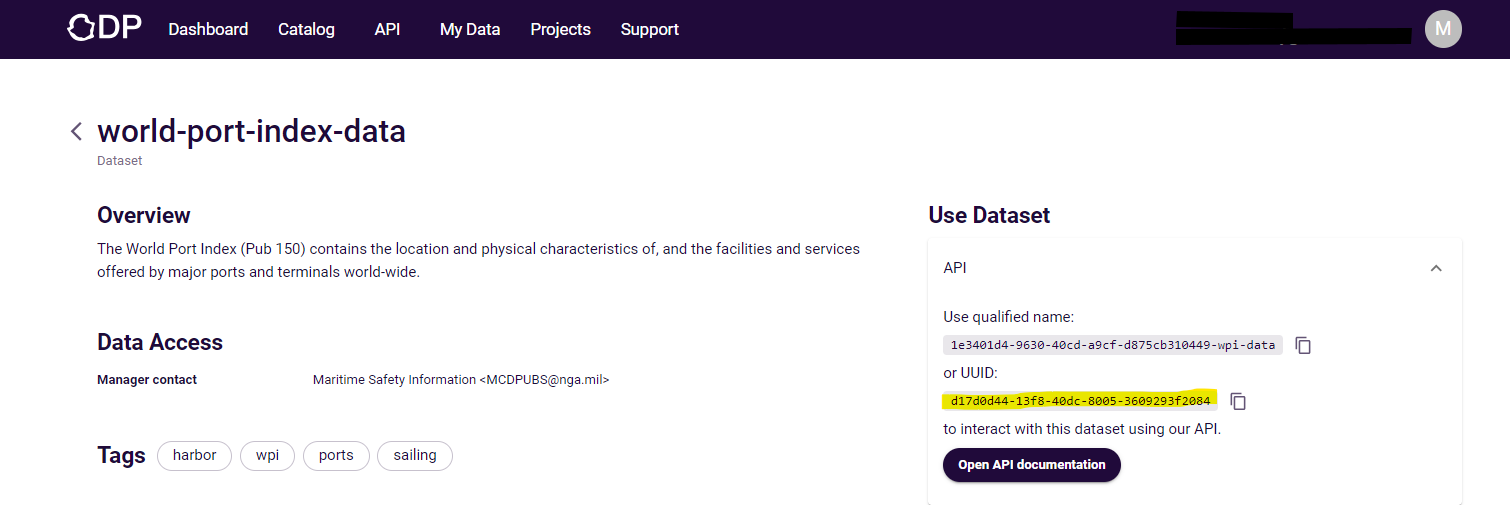

In [4]:
## Request the dataset from the catalog using the UUID:
WPI_dataset = client.catalog.get("d17d0d44-13f8-40dc-8005-3609293f2084")
## Verify the name of the dataset requested
WPI_dataset.metadata.display_name
## Request some data from the dataset
WPI_data = client.tabular.select_as_list(WPI_dataset, limit=1000)

In [5]:
# convert naming of geometry column to fit in with pydeck's expectations
for item in WPI_data:
    if 'odp-geometry' in item:
        item['geometry'] = item.pop('odp-geometry')

In [6]:
# for the plotting we can reduce the number of fields, to just "Main Port Name" and "Geometry
WPI_plot_data = [{'Main Port Name': item.get('Main Port Name', ''), 'geometry': item.get('geometry', '')} for item in WPI_data]
WPI_plot_data[0]

{'Main Port Name': 'Maurer',
 'geometry': {"coordinates": [-74.25, 40.533333], "type": "Point"}}

## Visualize data

### Plot datapoints from query on a map

In [7]:
simple_pydeck_plot([WPI_plot_data], lat=55, lon=7, zoom=1)

{
  "initialViewState": {
    "latitude": 55,
    "longitude": 7,
    "zoom": 1
  },
  "layers": [
    {
      "@@type": "GeoJsonLayer",
      "data": [
        {
          "Main Port Name": "Maurer",
          "geometry": {
            "coordinates": [
              -74.25,
              40.533333
            ],
            "type": "Point"
          }
        },
        {
          "Main Port Name": "Iharana",
          "geometry": {
            "coordinates": [
              50.0,
              -13.35
            ],
            "type": "Point"
          }
        },
        {
          "Main Port Name": "Andoany",
          "geometry": {
            "coordinates": [
              48.3,
              -13.4
            ],
            "type": "Point"
          }
        },
        {
          "Main Port Name": "Chake Chake",
          "geometry": {
            "coordinates": [
              39.766667,
              -5.25
            ],
            "type": "Point"
          }
        },
        {
          "Main Port Name": "Mjimwema Terminal",
          "geometry": {
            "coordinates": [
              39.366667,
              -6.816667
            ],
            "type": "Point"
          }
        },
        {
          "Main Port Name": "Delta Terminal",
          "geometry": {
            "coordinates": [
              36.166667,
              36.85
            ],
            "type": "Point"
          }
        },
        {
          "Main Port Name": "Cinta Oil Terminal",
          "geometry": {
            "coordinates": [
              106.233333,
              -5.5
            ],
            "type": "Point"
          }
        },
        {
          "Main Port Name": "Europa Point",
          "geometry": {
            "coordinates": [
              -5.35,
              36.133333
            ],
            "type": "Point"
          }
        },
        {
          "Main Port Name": "New Harbor",
          "geometry": {
            "coordinates": [
              -69.483333,
              43.866667
            ],
            "type": "Point"
          }
        },
        {
          "Main Port Name": "Dtse / Gegua Oil Terminal",
          "geometry": {
            "coordinates": [
              -43.15,
              -22.816667
            ],
            "type": "Point"
          }
        },
        {
          "Main Port Name": "Sharmah",
          "geometry": {
            "coordinates": [
              35.25,
              27.933333
            ],
            "type": "Point"
          }
        },
        {
          "Main Port Name": "Norsworthy",
          "geometry": {
            "coordinates": [
              -95.2,
              29.733333
            ],
            "type": "Point"
          }
        },
        {
          "Main Port Name": "Minturn",
          "geometry": {
            "coordinates": [
              -68.45,
              44.15
            ],
            "type": "Point"
          }
        },
        {
          "Main Port Name": "Criehaven",
          "geometry": {
            "coordinates": [
              -68.883333,
              43.833333
            ],
            "type": "Point"
          }
        },
        {
          "Main Port Name": "North Point",
          "geometry": {
            "coordinates": [
              -14.366667,
              -7.883333
            ],
            "type": "Point"
          }
        },
        {
          "Main Port Name": "Bongkot Terminal",
          "geometry": {
            "coordinates": [
              102.333333,
              8.05
            ],
            "type": "Point"
          }
        },
        {
          "Main Port Name": "Donggala",
          "geometry": {
            "coordinates": [
              119.733333,
              -0.65
            ],
            "type": "Point"
          }
        },
        {
          "Main Port Name": "Larimna",
          "geometry": {
            "coordinates": [
              23.283333,
            

### Inspect data
Option 1): work with list of datapoints

In [8]:
#inspecting the fifth item of the list (numbering starts from 0)
print(WPI_data[4:5])

[{'Pilotage - Advisable': 'Unknown', 'Maximum Vessel Beam (m)': 0.0, 'UN/LOCODE': ' ', 'Latitude': -6.816667, 'Facilities - Wharves': 'Unknown', 'Facilities - Beach Mooring': 'Unknown', 'Quarantine - Other': 'Yes', 'Supplies - Diesel Oil': 'No', 'Repairs': None, 'US Representative': 'No', 'Facilities - LNG Terminal': 'Unknown', 'Cargo Pier Depth (m)': 0.0, 'Maximum Vessel Draft (m)': 0.0, 'Channel Depth (m)': 23.2, 'Oil Terminal Depth (m)': 15.5, 'Railway': 'Unknown', 'Cranes - Fixed': 'Unknown', 'Offshore Maximum Vessel Length (m)': 0.0, 'Facilities - Breakbulk': 'Unknown', 'Anchorage Depth (m)': 17.1, 'Maximum Vessel Length (m)': 0.0, 'Services - Longshoremen': 'Unknown', 'Services -Diving': 'Unknown', 'Facilities - Ro-Ro': 'Unknown', 'Supplies - Deck': 'No', 'Port Security': 'Unknown', 'World Water Body': 'Indian Ocean', 'Harbor Type': 'Open Roadstead', 'IHO S-130 Sea Area': ' ', 'Entrance Width (m)': 0.0, 'Offshore Maximum Vessel Beam (m)': 0.0, 'NAVAREA': 'VIII', 'Facilities - Ice

Option 2): convert from the list to a pandas dataframe

In [9]:
pd.DataFrame(WPI_data).head(2)

,Pilotage - Advisable,Maximum Vessel Beam (m),UN/LOCODE,Latitude,Facilities - Wharves,Facilities - Beach Mooring,Quarantine - Other,Supplies - Diesel Oil,Repairs,US Representative,...,Entrance Restriction - Tide,Facilities - Med Mooring,Chemical Holding Tank Disposal,Services - Navigation Equipment,Communications - Telefax,Traffic Separation Scheme,IHO S-101 Electronic Navigational Chart,Overhead Limits,Search and Rescue,geometry
0,Unknown,0.0,,40.533333,Yes,Unknown,Unknown,Yes,Moderate,No,...,No,Unknown,Unknown,Unknown,Unknown,Unknown,,Yes,Unknown,"{'type': 'Point', 'coordinates': [-74.25, 40.5..."
1,Unknown,0.0,,-13.350000,Unknown,Unknown,Unknown,No,Emergency Only,Unknown,...,Unknown,Yes,Unknown,Unknown,Unknown,Unknown,,Unknown,Unknown,"{'type': 'Point', 'coordinates': [50.0, -13.35]}"


Option 3): use 'tabular.select_as_dataframe' function of the SDK

In [10]:
WPI_df = client.tabular.select_as_dataframe(WPI_dataset)
WPI_df

,Pilotage - Advisable,Maximum Vessel Beam (m),UN/LOCODE,Latitude,Facilities - Wharves,Facilities - Beach Mooring,Quarantine - Other,Supplies - Diesel Oil,Repairs,US Representative,...,Pilotage - Available,Entrance Restriction - Tide,Facilities - Med Mooring,Chemical Holding Tank Disposal,Services - Navigation Equipment,Communications - Telefax,Traffic Separation Scheme,IHO S-101 Electronic Navigational Chart,Overhead Limits,Search and Rescue
0,Unknown,0.0,,40.533333,Yes,Unknown,Unknown,Yes,Moderate,No,...,Unknown,No,Unknown,Unknown,Unknown,Unknown,Unknown,,Yes,Unknown
1,Unknown,0.0,,-13.350000,Unknown,Unknown,Unknown,No,Emergency Only,Unknown,...,Yes,Unknown,Yes,Unknown,Unknown,Unknown,Unknown,,Unknown,Unknown
2,Yes,0.0,,-13.400000,Unknown,Unknown,Unknown,No,Emergency Only,Unknown,...,No,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,,Unknown,Unknown
3,Unknown,0.0,,-5.250000,Unknown,Unknown,Yes,No,Unknown,Unknown,...,Yes,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,,Unknown,Unknown
4,Unknown,0.0,,-6.816667,Unknown,Unknown,Yes,No,None,No,...,Yes,No,Unknown,Unknown,Unknown,Unknown,Unknown,,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3809,Yes,0.0,CL PUQ,-53.166667,Yes,Unknown,Unknown,Yes,Moderate,No,...,Yes,No,Yes,Unknown,Yes,Yes,Unknown,,Unknown,Unknown
3810,Unknown,0.0,EG SKT,31.056714,Yes,Unknown,Yes,No,None,Yes,...,Yes,No,Unknown,Unknown,No,Unknown,Unknown,,Unknown,Unknown
3811,Unknown,60.0,CN DSN,23.756667,Unknown,Unknown,Yes,Yes,Limited,Unknown,...,Yes,Yes,Unknown,Unknown,Unknown,Unknown,Unknown,,Unknown,Unknown
3812,Yes,0.0,CL PCH,-45.466667,Yes,Unknown,Yes,Yes,None,Unknown,...,Yes,Yes,Unknown,Unknown,Unknown,Unknown,Unknown,,No,Unknown


### Test a geospatial query of some points

In [11]:
# Enter min and max latitude and longitude values to create a bounding box polygon below. Or use the structure below to add any Well-Known-Text or GeoJSON defined polygon.
bbox_lat_min = 60
bbox_lat_max = 70
bbox_lon_min = 2
bbox_lon_max = 7

In [12]:
geospatial_query = {
    "#ST_WITHIN": [
          "$odp-geometry",
        #replace the following string if you want to creat your own geospatial polygon search
          f"POLYGON(({bbox_lon_min} {bbox_lat_min}, {bbox_lon_max} {bbox_lat_min}, {bbox_lon_max} {bbox_lat_max}, {bbox_lon_min} {bbox_lat_max}, {bbox_lon_min} {bbox_lat_min}))"
    ]
}

In [13]:
geospatial_query

{'#ST_WITHIN': ['$odp-geometry', 'POLYGON((2 60, 7 60, 7 70, 2 70, 2 60))']}

In [14]:
WPI_data_subset = client.tabular.select_as_list(WPI_dataset, filter_query=geospatial_query, limit=10000)

In [15]:
# convert naming of geometry column to fit in with pydeck's expectations
for item in WPI_data_subset:
    if 'odp-geometry' in item:
        item['geometry'] = item.pop('odp-geometry')

In [16]:
# viewing the geospatial subset
simple_pydeck_plot([WPI_data_subset], size=3, lat=60, lon=7, zoom=4)

{
  "initialViewState": {
    "latitude": 60,
    "longitude": 7,
    "zoom": 4
  },
  "layers": [
    {
      "@@type": "GeoJsonLayer",
      "data": [
        {
          "Alternate Port Name": " ",
          "Anchorage Depth (m)": 7.9,
          "Cargo Pier Depth (m)": 11.0,
          "Channel Depth (m)": 23.2,
          "Chemical Holding Tank Disposal": "Unknown",
          "Communications - Airport": "Yes",
          "Communications - Radio": "Yes",
          "Communications - Radiotelephone": "Yes",
          "Communications - Rail": "Yes",
          "Communications - Telefax": "Yes",
          "Communications - Telephone": "Yes",
          "Country Code": "Norway",
          "Cranes - Fixed": "Yes",
          "Cranes - Floating": "Yes",
          "Cranes - Mobile": "Yes",
          "Cranes Container": "Unknown",
          "Degaussing": "Unknown",
          "Digital Nautical Chart": "a2123160, coa21f, gen21a, h2123160",
          "Dirty Ballast Disposal": "Yes",
          "Dry Dock": "Medium",
          "Entrance Restriction - Heavy Swell": "No",
          "Entrance Restriction - Ice": "No",
          "Entrance Restriction - Other": "Yes",
          "Entrance Restriction - Tide": "No",
          "Entrance Width (m)": 0.0,
          "Estimated Time of Arrival Message": "Yes",
          "Facilities - Anchorage": "Yes",
          "Facilities - Beach Mooring": "Unknown",
          "Facilities - Breakbulk": "Yes",
          "Facilities - Container": "Yes",
          "Facilities - Dangerous Cargo Anchorage": "Unknown",
          "Facilities - Ice Mooring": "Unknown",
          "Facilities - LNG Terminal": "Yes",
          "Facilities - Liquid Bulk": "Yes",
          "Facilities - Med Mooring": "Unknown",
          "Facilities - Oil Terminal": "No",
          "Facilities - Other": "Unknown",
          "Facilities - Ro-Ro": "Yes",
          "Facilities - Solid Bulk": "Yes",
          "Facilities - Wharves": "Yes",
          "First Port of Entry": "Yes",
          "Garbage Disposal": "No",
          "Good Holding Ground": "Yes",
          "Harbor Size": "Medium",
          "Harbor Type": "Coastal (Natural)",
          "Harbor Use": "Unknown",
          "IHO S-101 Electronic Navigational Chart": " ",
          "IHO S-130 Sea Area": " ",
          "IHO S-57 Electronic Navigational Chart": " ",
          "Latitude": 60.402777778,
          "Lifts - 0-24 Tons": "Unknown",
          "Lifts - 100+ Tons": "Unknown",
          "Lifts - 25-49 Tons": "Yes",
          "Lifts - 50-100 Tons": "Yes",
          "Liquified Natural Gas Terminal Depth (m)": 0.0,
          "Longitude": 5.298611111,
          "Main Port Name": "Bergen",
          "Maximum Vessel Beam (m)": 0.0,
          "Maximum Vessel Draft (m)": 12.0,
          "Maximum Vessel Length (m)": 0.0,
          "Medical Facilities": "Yes",
          "NAVAREA": "I",
          "Offshore Maximum Vessel Beam (m)": 0.0,
          "Offshore Maximum Vessel Draft (m)": 0.0,
          "Offshore Maximum Vessel Length (m)": 0.0,
          "Oil Terminal Depth (m)": 6.4,
          "Overhead Limits": "Yes",
          "Pilotage - Advisable": "Yes",
          "Pilotage - Available": "Yes",
          "Pilotage - Compulsory": "Yes",
          "Pilotage - Local Assistance": "Unknown",
          "Port Security": "Unknown",
          "Publication Link": "https://msi.geo.nga.mil/api/publications/download?key=16694491/SFH00000/Pub182bk.pdf&type=view",
          "Quarantine - Other": "Unknown",
          "Quarantine - Pratique": "Yes",
          "Quarantine - Sanitation": "Yes",
          "Railway": "Small",
          "Region Name": "Norway -- 20620",
          "Repairs": "Major",
          "Sailing Direction or Publication": "Sailing Directions Pub. 182 (Enroute) - North and West Coasts of Norway",
          "Search and Rescue": "Unknown",
          "Services - Electrical Repair": "Yes",
          "Services - Electricity": "Yes",
          "Services - Ice Breaking": "Unknown",
          "Services - Longshorem